In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
from google.colab import files
file = files.upload()

Saving Pride_and_Prejudice.txt to Pride_and_Prejudice.txt


In [ ]:
file = open("Pride_and_Prejudice.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
  lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ''.join(lines)

# replace unnecessary stuff with space
data = data.replace('\n', ' ').replace('\r', ' ').replace('\ufeff', ' ').replace('“', ' ').replace('”', ' ').replace('.', ' ').replace(',', ' ').replace(':', ' ')
data = data.replace('[', ' ').replace(']', ' ').replace('(', ' ').replace(')', ' ').replace('_', ' ').replace('*', ' ').replace('#', ' ')
data = data.replace('/', '').replace('!', ' ')

In [ ]:
#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data = data.lower()
data[:5000]

'the project gutenberg ebook of pride and prejudice by jane austen this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever you may copy it give it away or re-use it under the terms of the project gutenberg license included with this ebook or online at www gutenberg org if you are not located in the united states you will have to check the laws of the country where you are located before using this ebook title pride and prejudice author jane austen release date november 12 2022 ebook 1342 most recently updated march 14 2023 language english produced by chuck greif and the online distributed proofreading team at http www pgdp net this file was produced from images available at the internet archive start of the project gutenberg ebook pride and prejudice illustration george allen publisher 156 charing cross road london ruskin house illustration reading jane’s letters chap 34 pride and prejudi

In [ ]:
len(data)

715090

In [ ]:
#Tokenization:
tokenizer = Tokenizer()  
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
# pickle.dump() and dumps() are used to serialize an object. The only difference between them is that dump() writes the data to a file, 
#    while dumps() represents it as a byte object. 
pickle.dump(tokenizer, open('token.pkl', 'wb'))

In [ ]:
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 182, 164, 1000, 3, 299, 4, 946, 30, 72, 710, 41, 1000, 23, 21]

In [ ]:
len(sequence_data)

131231

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size) #..

7255


In [ ]:
#z

sequences = []

for i in range(5, len(sequence_data)):
  words = sequence_data[i-5: i+1]
  sequences.append(words)

print("The length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10] #use 5 words, get next word.

The length of sequences are:  131226


array([[   1,  182,  164, 1000,    3,  299],
       [ 182,  164, 1000,    3,  299,    4],
       [ 164, 1000,    3,  299,    4,  946],
       [1000,    3,  299,    4,  946,   30],
       [   3,  299,    4,  946,   30,   72],
       [ 299,    4,  946,   30,   72,  710],
       [   4,  946,   30,   72,  710,   41],
       [ 946,   30,   72,  710,   41, 1000],
       [  30,   72,  710,   41, 1000,   23],
       [  72,  710,   41, 1000,   23,   21]])

In [ ]:
X = []
y = []


for i in sequences:
  X.append(i[0:5])
  y.append(i[5])

X = np.array(X)
y = np.array(y)

In [ ]:
X

array([[   1,  182,  164, 1000,    3],
       [ 182,  164, 1000,    3,  299],
       [ 164, 1000,    3,  299,    4],
       ...,
       [ 201, 4362, 7254,    2,  231],
       [4362, 7254,    2,  231,  126],
       [7254,    2,  231,  126,  524]])

In [ ]:
X.shape

(131226, 5)

In [ ]:
y

array([ 299,    4,  946, ...,  126,  524, 1756])

In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
X_valid = []
y_valid = []

for i in range(3, len(sequence_data)-5, 6):
  X_valid.append(sequence_data[i:i+5])
  y_valid.append(sequence_data[i+5])

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
y_valid = to_categorical(y_valid, num_classes=vocab_size)
y_valid[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
print(X_valid.shape)
X_valid

(21871, 5)


array([[1000,    3,  299,    4,  946],
       [  72,  710,   41, 1000,   23],
       [   1,  507,    3,  549, 2654],
       ...,
       [  78,    2,  363, 1945,  201],
       [1756,    4,   78,    2, 7253],
       [ 201, 4362, 7254,    2,  231]])

In [ ]:
print(y_valid.shape)
y_valid

(21871, 7255)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# simple LSTM
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Flatten

# vocabulary = 10000
embedding_dim = 10
word_num = 5
# state_dim = 10

# model = Sequential()
# model.add(Embedding(vocabulary, embedding_dim, input_length=word_num))
# model.add(LSTM(state_dim, return_sequences=False))
# model.add(Dense(1, activation='softmax'))
# model.summary()



model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=word_num))
model.add(LSTM(512, return_sequences=False))
model.add(Dense(vocab_size, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 5, 10)             72550     
                                                                 
 lstm_1 (LSTM)               (None, 512)               1071104   
                                                                 
 dense_1 (Dense)             (None, 7255)              3721815   
                                                                 
Total params: 4,865,469
Trainable params: 4,865,469
Non-trainable params: 0
_________________________________________________________________


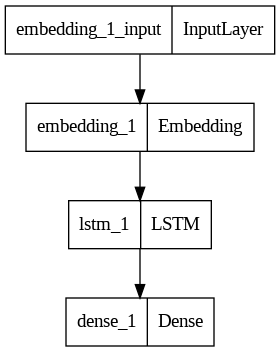

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='plot.png', show_layer_names=True)

In [ ]:
from keras import optimizers

epochs = 50

# model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])

# model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_valid, y_valid))





# from tensorflow.keras.callbacks import ModelCheckpoint
# checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
# model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
# model.fit(X, y, epochs=10, batch_size=64, callbacks=[checkpoint])


model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])

model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_valid, y_valid))



Epoch 1/50
3281/3281 [==============================] - 495s 150ms/step - loss: 6.3051 - acc: 0.0556 - val_loss: 5.8211 - val_acc: 0.0868
Epoch 2/50
3281/3281 [==============================] - 479s 146ms/step - loss: 5.6412 - acc: 0.1003 - val_loss: 5.4271 - val_acc: 0.1161
Epoch 3/50
3281/3281 [==============================] - 475s 145ms/step - loss: 5.3027 - acc: 0.1221 - val_loss: 5.1616 - val_acc: 0.1303
Epoch 4/50
3281/3281 [==============================] - 476s 145ms/step - loss: 5.0143 - acc: 0.1349 - val_loss: 4.8924 - val_acc: 0.1462
Epoch 5/50
3281/3281 [==============================] - 469s 143ms/step - loss: 4.7027 - acc: 0.1473 - val_loss: 4.5899 - val_acc: 0.1633
Epoch 6/50
3281/3281 [==============================] - 473s 144ms/step - loss: 4.3536 - acc: 0.1657 - val_loss: 4.2586 - val_acc: 0.2046
Epoch 7/50
3281/3281 [==============================] - 470s 143ms/step - loss: 3.9681 - acc: 0.1975 - val_loss: 3.9456 - val_acc: 0.2500
Epoch 8/50
3281/3281 [============

In [ ]:
# Prediction

def Prediction_next_word(text):
  sequence_text = tokenizer.texts_to_sequences([text])
  sequence_text = np.array(sequence_text)
  preds = np.argmax(model.predict(sequence_text))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
    if value==preds:
      predicted_word = key
      break
  
  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")

  if text == "0":
    print("Excution completed.")
    break

  else:
    try:
      text = text.split(" ")
      
      text = text[-5:]
      print(text)

      Prediction_next_word(text)
    
    except Exception as e:
      print("Error occured: ", e)
      continue